In [1]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [6]:
import xgboost
import shap
import pandas as pd    
from google.colab import drive
from google.colab import files 

In [7]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [17]:
df = pd.read_csv('/content/drive/MyDrive/FallThesisProject/imu_data_resample.csv')
df

,left_acc_x_mean,left_acc_x_max,left_acc_x_min,left_acc_y_mean,left_acc_y_max,left_acc_y_min,left_acc_z_mean,left_acc_z_max,left_acc_z_min,right_acc_x_mean,right_acc_x_max,right_acc_x_min,right_acc_y_mean,right_acc_y_max,right_acc_y_min,right_acc_z_mean,right_acc_z_max,right_acc_z_min,facial expression
0,-656.059486,-671.251419,-663.655453,733.900945,722.875112,728.388028,-80.453828,-81.739468,-81.096648,615.918732,607.216136,611.567434,771.286974,768.872735,770.079855,-202.953909,-216.567989,-209.760949,2.0
1,-355.817065,-365.824669,-360.820867,919.245032,917.119456,918.182244,-82.950818,-104.262966,-93.606892,268.673153,261.724609,265.198881,956.421732,952.490710,954.456221,-130.341194,-133.953974,-132.147584,0.0
2,-761.447189,-774.336828,-767.892008,635.078006,632.926869,634.002438,0.416455,-37.081042,-18.332293,742.123033,735.699532,738.911283,656.126014,644.792957,650.459486,-232.091437,-248.747288,-240.419362,3.0
3,-776.295853,-816.103120,-796.199486,620.620019,567.854182,594.237100,3.944087,-28.237815,-12.146864,688.497335,644.307553,666.402444,774.558552,727.486539,751.022546,-105.880023,-134.342738,-120.111380,1.0
4,-537.638251,-684.997761,-611.318006,785.739136,679.869194,732.804165,-117.996377,-277.920187,-197.958282,487.054515,311.874730,399.464623,921.972068,901.353696,911.662882,-183.079306,-246.912066,-214.995686,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,-756.546833,-774.736688,-765.641760,638.622066,618.694251,628.658158,-25.438037,-51.580542,-38.509289,759.091291,745.128944,752.110118,647.123949,637.048642,642.086296,-210.423497,-235.686233,-223.054865,3.0
348,-617.010467,-637.352259,-627.181363,772.926464,762.651850,767.789157,-54.469202,-67.878087,-61.173645,583.209077,571.585962,577.397520,789.086722,771.592126,780.339424,-257.052161,-287.918578,-272.485369,4.0
349,-736.935937,-743.665567,-740.300752,665.145266,650.066981,657.606123,32.502670,-53.977777,-10.737553,695.868422,681.133416,688.500919,738.786331,705.781452,722.283891,-127.796310,-222.475631,-175.135970,4.0
350,-813.240431,-815.339720,-814.290076,509.882102,498.217431,504.049767,-232.001794,-276.235365,-254.118579,704.036109,684.598996,694.317552,738.095719,715.408348,726.752033,136.065526,85.977394,111.021460,5.0


In [18]:
train_cols = df.columns[0:-1]
label = df.columns[-1]
X = df[train_cols]
y = df[label]

[20:22:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


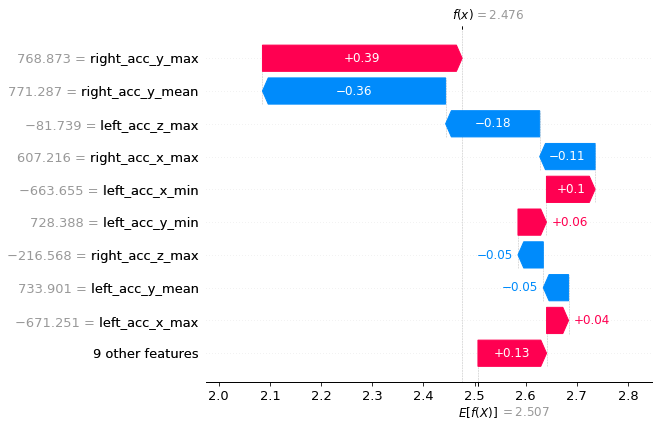

In [29]:
model = xgboost.XGBRegressor().fit(X, y)
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

In [30]:
shap.initjs()
shap.plots.force(shap_values[0])

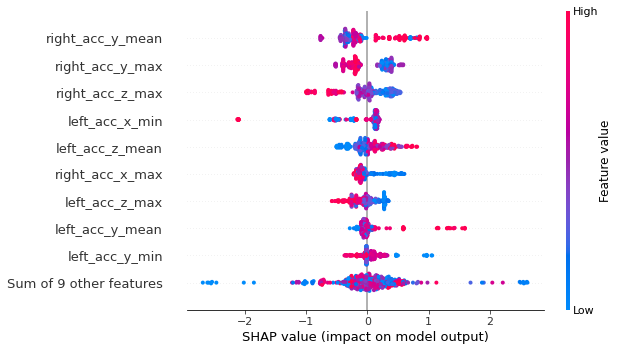

In [32]:
shap.plots.beeswarm(shap_values)

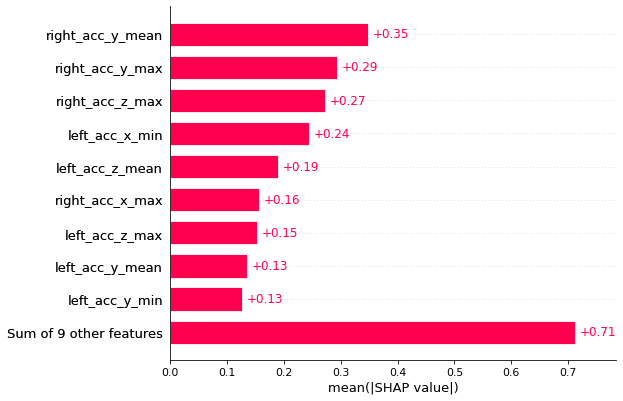

In [33]:
shap.plots.bar(shap_values)

In [36]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 7.7 MB/s 
     |████████████████████████████████| 7.6 MB 49.8 MB/s 
     |████████████████████████████████| 163 kB 53.3 MB/s 


In [37]:
import transformers
import shap

# load a transformers pipeline model
model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# explain the model on two sample inputs
explainer = shap.Explainer(model) 
shap_values = explainer(["What a great movie! ...if you have no taste."])

# visualize the first prediction's explanation for the POSITIVE output class
shap.plots.text(shap_values[0, :, "POSITIVE"])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

`return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.


  0%|          | 0/240 [00:00<?, ?it/s]

Partition explainer: 2it [00:25, 25.42s/it]               


In [40]:
import sklearn
import shap
from sklearn.model_selection import train_test_split

# print the JS visualization code to the notebook
shap.initjs()

# train a SVM classifier
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

X does not have valid feature names, but SVC was fitted with feature names


  0%|          | 0/71 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pip

In [42]:
# plot the SHAP values for the Setosa output of all instances
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")